(don't forget to add a cover page with the title of your contribution, the composition of the group and the name of the major to which you belong.)

# Visualizing the Impact of Lifestyle on Stroke Risk

## 1. Introduction 

### 1.1 Brief Context of Stroke as a Global Health Issue

Stroke remains a leading cause of death worldwide, with an increasing burden in lower-income countries. The [World Stroke Organization](https://www.world-stroke.org/news-and-blog/news/wso-global-stroke-fact-sheet-2022) highlights a 70.0% rise in incident strokes and a 43.0% increase in stroke-related deaths from 1990 to 2019, emphasizing the urgent need for effective stroke prevention and management strategies.

### 1.2 Problem Statement: Analyzing Lifestyle and Stroke Risk

**Problem Statement:** In this project, we aim to explore the relationship between lifestyle choices and the probability of stroke. Our goal is to visualize how healthy and unhealthy habits, alongside other factors, contribute to an individual's risk of experiencing a stroke. This involves analyzing data on various health indicators, such as age, hypertension, heart disease, glucose levels, BMI, and smoking status, to discern patterns that may predict stroke likelihood.

**Objective:** By creating a comprehensive visualization of these relationships, we seek to enhance understanding of stroke risk factors and support the development of targeted prevention strategies.

### 1.3 Questions and Assumptions

- **Questions:**
  1. How do different lifestyle choices impact the risk of stroke?
  2. Which factors are the most significant predictors of stroke?
  3. Can we identify specific patterns or trends among high-risk individuals?
  4. Does age has impact on strokes ? 
  5. Does body mass index and glucose level has impact on strokes ?

- **Assumptions:**
  1. Lifestyle factors such as diet, exercise, and smoking have a significant impact on stroke risk.
  2. Demographic factors like age and gender also play a crucial role in determining stroke likelihood.
  3. Data visualization can effectively communicate complex relationships between multiple risk factors and stroke probability.

Our approach integrates analysis and visualization techniques to provide insights into how lifestyle choices affect stroke risk. We will use the Stroke Prediction Dataset, ensuring strict adherence to data privacy standards. This project not only aligns with our academic focus in Santé Biotech and Cybersecurity but also addresses a critical healthcare challenge. Through this endeavor, we aim to contribute to the understanding of stroke prevention and the broader discussion on healthcare data analytics and privacy.

### 1.4 Formalization of the Problem

**Problem Type:** Classification, i.e. considering the input variables, can we predict the likelihood of stroke? (Yes/No)

In the current dataset, there are 11 features and one binary target variable (stroke). The features are as follows:

| Field             | Description                                                                 |
|-------------------|-----------------------------------------------------------------------------|
| id                | Unique identifier                                                           |
| gender            | "Male", "Female" or "Other"                                                 |
| age               | Age of the patient                                                          |
| hypertension      | 0 if the patient doesn't have hypertension, 1 if the patient has hypertension |
| heart_disease     | 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease |
| ever_married      | "No" or "Yes"                                                               |
| work_type         | "children", "Govt_job", "Never_worked", "Private" or "Self-employed"        |
| Residence_type    | "Rural" or "Urban"                                                          |
| avg_glucose_level | Average glucose level in blood                                              |
| bmi               | Body mass index                                                             |
| smoking_status    | "formerly smoked", "never smoked", "smokes" or "Unknown"*                   |
| stroke            | 1 if the patient had a stroke or 0 if not                                   |

\*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### 1.5 Libraries and Tools

In [24]:
%pip install pandas
%pip install numpy
%pip install matplotlib.pyplot as plt
%pip install scikit-learn
%pip install xgboost


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Machine Learning Helpers
from sklearn.preprocessing import (StandardScaler, LabelEncoder, OneHotEncoder)
from sklearn.metrics import (confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score, precision_recall_curve)
from sklearn.model_selection import (train_test_split, GridSearchCV, StratifiedKFold, cross_val_score)

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from xgboost import XGBClassifier

# 

## 2. Data exploration

### 2.1 Loading the data

We start by loading the data into a pandas dataframe.

In [26]:
df = pd.read_csv('./_dataset/healthcare-dataset-stroke-data.csv', sep=',', encoding='utf-8')

In [27]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


We can already see that some of the rows hold some NaN values ... we will have to deal with that later.

### 2.2 Data exploration

Let's now get a closer look at the data we have.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [29]:
# Stats of numerical features
round(df.describe(), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [30]:
# Stats of categorical features
round(df.describe(include=['O']), 2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Then, let's analyze the distribution of the BMI values in the dataset, since it is the feature that have some missing values. It will help us to decide how to deal with the missing values, by choosing either to replace the missing values by the mean or the median of the BMI values.

If the distribution is centered around the mean, we will use the mean to replace the missing values. However, if they are some outliers, we will use the median to not introduce some bias in the data.

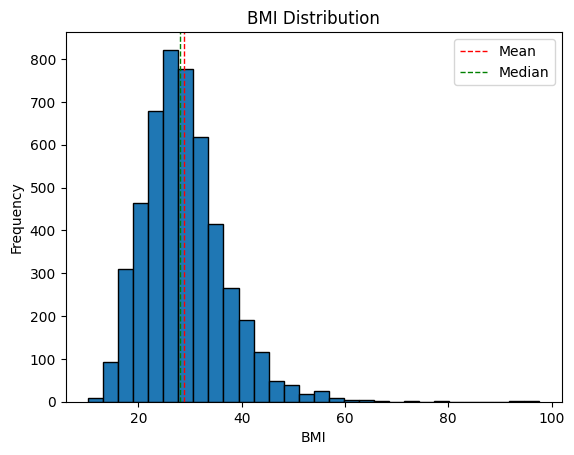

In [31]:
# Create a histogram of the 'bmi' column
plt.hist(df['bmi'].dropna(), bins=30, edgecolor='black')

# Add the mean and median lines
plt.axvline(df['bmi'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['bmi'].median(), color='green', linestyle='dashed', linewidth=1)

# Add a legend
plt.legend({'Mean':df['bmi'].mean(),'Median':df['bmi'].median()})

# Add a title and labels 
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")

# Display the plot
plt.show()

Both the mean and the median are close to each other, so we can use the mean to replace the missing values.

From our analysis, we can draw several conclusions:

- The dataset contains **numerical**, **categorical**, and **binary** data. 
    - **Numerical data** includes `age`, `avg_glucose_level`, and `bmi`.
    - **Categorical data** includes `gender`, `ever_married`, `work_type`, `Residence_type`, and `smoking_status`.
    - **Binary data** includes `hypertension`, `heart_disease`, and `stroke`.

- **Categorical data** should be our focus as it will be the most interesting to visualize.

- The `stroke` column, which is binary (0 or 1), is our **target variable**.

- `BMI` (Body Mass Index) is a numerical value with some missing data. Instead of dropping the rows with missing data, we should fill them with the **mean value** of the column, as both the mean and the median are close to each other. 

- `BMI` can trace back to someone's personal information if correlated with other data. To address this, we'll implement the model with **continuous BMI**, and then with a **discretized BMI** to see if it changes the results drastically.

## 2.3 Filling missing values

We will now fill the missing values in the `bmi` column with the mean value of the column.

In [32]:
# Use a simple imputer to fill in the missing values with the median value of the dataset
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']])

df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## 3. Data analysis and visualization : solutions and arguments for the choice of the two algorithms

### 3.1 Distribution of target variable : Healthy vs Stroke 

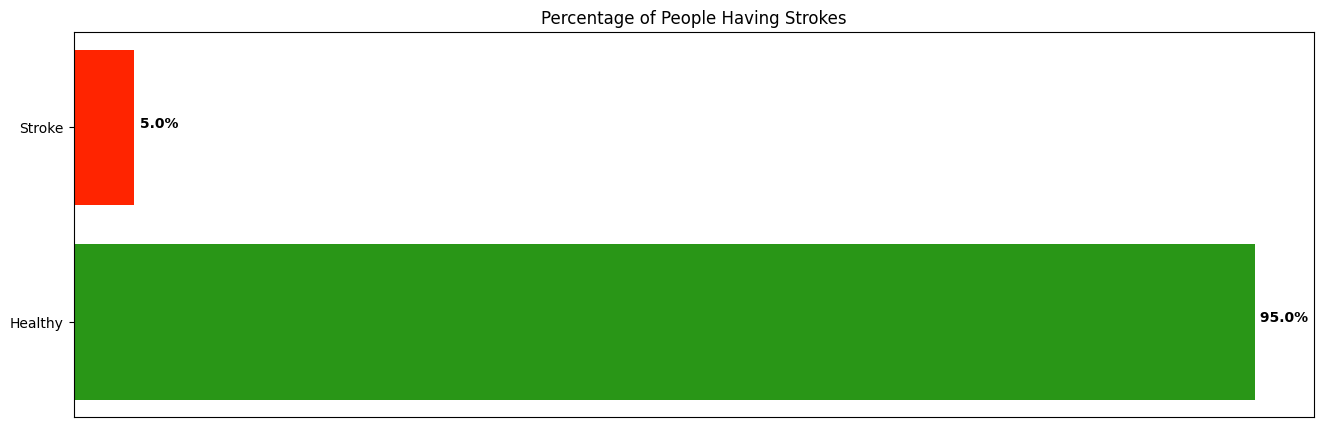

In [72]:
# Count the number of occurrences of each unique value in the 'stroke' column
x = df['stroke'].value_counts()

# Calculate the proportion of stroke cases in the dataset
stroke_proportion = round(x[1]/x[0], 2)*100

# Create a bar plot
fig, ax = plt.subplots()

# Plot the counts
ax.barh(x.index, x.values, color=['#299617', '#ff2400'])

# Label the y-axis with the unique values in the 'stroke' column
ax.set_yticks(x.index)
ax.set_yticklabels(['Healthy', 'Stroke'])

# Show the percentage above the bars
for i, v in enumerate(x.values):
    if i == 1:  # If the current bar corresponds to stroke cases
        ax.text(v + 3, i, f" {stroke_proportion}%", color='black', fontweight='bold')
    else:  # If the current bar corresponds to healthy cases
        ax.text(v + 3, i, f" {100 - stroke_proportion}%", color='black', fontweight='bold')

# Hide the x-axis
ax.get_xaxis().set_visible(False)

# Set the title
ax.set_title('Percentage of People Having Strokes')

# Increase the size to fit the text
fig.set_size_inches(16, 5)

# Show the plot
plt.show()

We can see about that 5 patient over 1000 has stroke. This is a heavy **umbalanced** in the dataset, that we'll have to take into consideration when we'll train our model.


## 4. Cybersecurity: Data Privacy and Ethics, implementing anonymization techniques

### 3.1 Data Privacy 

In today's digital world, data privacy is a critical issue. As we increasingly
rely on technology to manage our lives, we must ensure that our data is
protected from misuse. This is especially important in the healthcare sector,
where sensitive information is at risk of being compromised. Both in the US and
the EU, there are strict regulations in place to protect patient data. 

In the US, the [Health Insurance Portability and Accountability Act (HIPAA)](https://www.hhs.gov/hipaa/for-professionals/privacy/laws-regulations/index.html) establishes national standards for the protection of health information. In the EU, the [General Data Protection Regulation (GDPR)](https://commission.europa.eu/law/law-topic/data-protection/data-protection-eu_en) sets guidelines for the collection and processing of personal data. These regulations are designed to safeguard patient privacy and prevent unauthorized access to sensitive information. 

### 3.2 Anonymization Techniques

In this project, we will use the Stroke Prediction Dataset, which contains personal data that can be viewed as sensitive. As demonstrated by the study by [Sweeney, L. (2000)](https://privacytools.seas.harvard.edu/sites/projects.iq.harvard.edu/files/privacytools/files/paper1.pdf) on the re-identification of individuals in the U.S. population, it is possible to identify 87.1\% of the population based only on {5-digit ZIP, gender, date of birth}. Therefore, we must take steps to protect the privacy of the individuals in our dataset, since our features can be used to identify them in a similar way.

To do so, we will use the following anonymization techniques:
- **Generalization:** We will replace the age and glucose level values with age ranges and glucose level ranges, respectively. This will reduce the granularity of the data, making it more difficult to identify individuals.
- **Hashing:** We will hash the value of the ID field, which will prevent the identification of individuals based on this feature.
- **Differential Privacy:** see below... https://en.wikipedia.org/wiki/Differential_privacy https://www.kaggle.com/code/samuelguebo/implementing-privacy-preservation-through-python

One of the biggest drawback of privacy is that it can limit the usefulness of the data. It is always a trade-off between privacy and accuracy. In this project, we will use the [Differential Privacy](https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf) technique to protect the privacy of the individuals in our dataset while still allowing for meaningful analysis by adjusting the amount of noise $\epsilon$ added to the data. 

We'll compare the accuracy of our results **with and without differential privacy to determine the optimal value of $\epsilon$.**
 
##### what will will do (temporary section to work with)
Implementing differential privacy in the Stroke Prediction Dataset involves adding controlled noise to the data to protect individual privacy while still allowing for meaningful analysis. Differential privacy is a technique that ensures the output of a query on a dataset does not reveal whether any individual's data was included in the input.

Here's a step-by-step approach to implement differential privacy:

1. **Understanding the Dataset**: First, get a thorough understanding of the dataset. Identify the types of data (categorical, numerical, etc.) and understand their distributions and importance in stroke prediction.

2. **Choosing a Differential Privacy Mechanism**: Select an appropriate differential privacy mechanism. The most common mechanisms are the Laplace mechanism (for numerical data) and the Exponential mechanism (for categorical data). The choice depends on the data type and the queries you intend to perform.

3. **Setting the Privacy Budget (ε)**: The privacy budget, often denoted as ε (epsilon), is a parameter that determines the level of privacy. A lower ε means higher privacy (and more noise), but it can reduce the utility of the data. Choose an ε that balances privacy with the need for accurate analysis.

4. **Applying Noise to the Data**:
   - For numerical data (like age, avg_glucose_level, and bmi), you can add noise drawn from a Laplace distribution. The amount of noise depends on the sensitivity of the query and your chosen ε.
   - For categorical data (like gender, work_type, and smoking_status), use the Exponential mechanism to randomly choose an output based on the probability distribution that depends on the privacy parameter and the utility of each outcome.

5. **Testing and Validation**: After applying differential privacy, it's essential to test the dataset. Check if the privacy guarantees hold and if the dataset still provides meaningful insights for stroke prediction. This might involve comparing the results of analyses on the original and the differentially private dataset.

6. **Implementing in Machine Learning Models**: When using the differentially private dataset for machine learning, be aware that the added noise might impact the model's accuracy. It may require tuning the models differently than you would with the original data.

7. **Ongoing Monitoring and Adjustment**: Differential privacy implementation isn't a one-time process. It requires continuous monitoring and adjustments based on the outcomes of your analyses and the evolving requirements of your project.

Remember, the key challenge in implementing differential privacy is balancing privacy protection with the usefulness of the data. This often requires experimentation and fine-tuning to get right.


## 5. Experimentation and discussion of the results

### 5.1 Discretization of sensitive numerical data

Let's try to discretize the `age`, `avg_glucose_level`, and `bmi` columns to see if it changes the results drastically.

For discretization, we will use the basis of medical standards. 
- [Assessing Your Weight](https://www.cdc.gov/healthyweight/assessing/index.html)
- [Blood Sugar Levels: What is Normal, Low or High, Target Ranges & More [w/ Downloadable Chart]](https://agamatrix.com/blog/normal-blood-sugar-level-chart/)
- [Age – Physical Description](https://kidspicturedictionary.com/english-through-pictures/people-english-through-pictures/age-physical-description/)

The specific ranges used for discretization are as follows:

**Age Ranges:**

| Age | Value |
|-----|-------|
| 0-13 | Child | 
| 13-18 | Teenager |
| 18-45 | Adult |
| 45-60 | Middle-Aged | 
| 60+ | Elderly |

---

**Glucose Level Ranges:**

| Glucose Level (mg/dL) | Value |
|---------------|-------|
| 0-90 | Low |
| 90-160 | Normal |
| 160-230 | High |
| 230-300 | Very High |

---

**BMI Ranges:**

| BMI | Value |
|-----|-------|
| 0-18.5 | Underweight |
| 18.5-25 | Normal |
| 25-30 | Overweight |
| 30-35 | Obese |




In [13]:
# Binning of the numerical features 

df['age'] = pd.cut(df['age'], bins=[0, 13, 18, 45, 60, 1000], labels=['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Elderly'])
df['avg_glucose_level'] = pd.cut(df['avg_glucose_level'], bins=[0, 90, 160, 230, 300], labels=['Low', 'Normal', 'High', 'Very High'])
df['bmi'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 1000], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [14]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,Elderly,0,1,Yes,Private,Urban,High,Obese,formerly smoked,1
1,51676,Female,Elderly,0,0,Yes,Self-employed,Rural,High,Overweight,never smoked,1
2,31112,Male,Elderly,0,1,Yes,Private,Rural,Normal,Obese,never smoked,1
3,60182,Female,Middle-Aged,0,0,Yes,Private,Urban,High,Obese,smokes,1
4,1665,Female,Elderly,1,0,Yes,Self-employed,Rural,High,Normal,never smoked,1


## 6. Group assessment (what you have learned, points for improvement, etc.)